In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/haylee360/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


### Spills
The first dataset is from the New York State government and it details information about spills of petroleum and other hazardous materials. By law, spillers are required to report basic information about the spill such as facility type, spill date and time, location, quantity, material, and more. This is to help streamline the clean-up process and mitigate as much damage as possible. 
- The data source is New York State Department of Environmental Conservation
- Date of access: 11/1/24


### Counties
The second dataset is a TIGER shape file of US county boundaries from 2023. This is geospatial data meant to help us map our oil spills onto our area of interest. 
- The data source is the US Census bureau
- Date of access: 11/1/24

## 3. Import libraries

In [2]:
# Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Generate file paths for the data
fp_spills = os.path.join('data', 'Spill_Incidents_20241101.csv')
fp_counties = os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')

In [4]:
# Import oil spill and county data
spills = pd.read_csv(fp_spills)
counties = gpd.read_file(fp_counties)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [5]:
# a. 
# View the first five rows of spills
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [6]:
# b.
# View the data types of each column in spills
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [7]:
# c. 
# Check unique values in material family
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
# d. 
# Check unique values in county
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

In [9]:
# Check the total NAs by variable
spills.isna().sum()

Spill Number                  0
Program Facility Name         6
Street 1                    132
Street 2                 510022
Locality                   1127
County                        0
ZIP Code                 499955
SWIS Code                     0
DEC Region                    0
Spill Date                  151
Received Date               477
Contributing Factor           0
Waterbody                506097
Source                        0
Close Date                11434
Material Name                 0
Material Family               0
Quantity                      0
Units                    110268
Recovered                     0
dtype: int64

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

This preliminary exploration gave me information about the different variables in the spills data frame and what the type of each variable was. I also explored the NA count in each variable and saw that there is a lot of missing data in the zip code, waterbody, and units variables. Lastly, I checked the unique values of the material family and county to find there are only 4 unique materials across 87 counties. 

<!-- END QUESTION -->

*Your answer here.*

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [10]:
# a. 
# Simplify column names of spills
spills.columns = (spills.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

In [11]:
# b. 
# Update column data types
spills[['spill_date', 'received_date', 'close_date']] = spills[['spill_date', 'received_date', 'close_date']].apply(pd.to_datetime)
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [12]:
# a. 
# Select the appropriate data range and filter to only petroleum spills
petr_23 = spills[ (spills['spill_date'] >= '2023-01-01') & 
                 (spills['spill_date'] <= '2023-10-31') & 
                 (spills['material_family'] == 'Petroleum')]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [13]:
# b. 
# Write print statements to confirm the date filtering worked correctly
print(f"{'The only year included in petr_23 is '}{petr_23.spill_date.dt.year.unique()}")
print(f"{'The only months included in petr_23 are '}{petr_23.spill_date.dt.month.sort_values().unique()}")

The only year included in petr_23 is [2023]
The only months included in petr_23 are [ 1  2  3  4  5  6  7  8  9 10]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [14]:
# c.
# Test that the material filtering worked correctly
assert petr_23['material_family'].unique() == 'Petroleum'

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [15]:
# Find spills per county and store in separate dataframe
spills_per_county = (pd.DataFrame(spills
                                  .groupby('county')
                                  .county
                                  .count())
                     .rename(columns={'county':'n_spills'})
                     .reset_index()
                    )
spills_per_county

,county,n_spills
0,Albany,15293
1,Allegany,1698
2,Bronx,14843
3,Broome,6530
4,Canada - Region 5,1
...,...,...
82,Washington,3646
83,Wayne,3239
84,Westchester,55274
85,Wyoming,1427


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [16]:
# a.
# Check the first 5 rows of the counties geodataframe
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [17]:
# b.
# Check the types of the counties geodataframe
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [18]:
# c.
# Check the CRS of counties
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

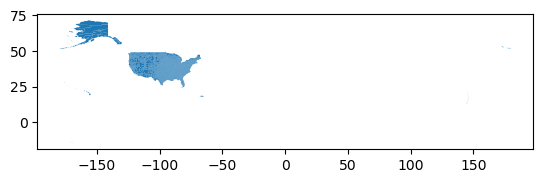

In [19]:
# d.
# Plot the counties geodataframe
counties.plot()

In [20]:
counties.isna().sum()

STATEFP        0
COUNTYFP       0
COUNTYNS       0
GEOID          0
GEOIDFQ        0
NAME           0
NAMELSAD       0
LSAD           0
CLASSFP        0
MTFCC          0
CSAFP       1894
CBSAFP      1320
METDIVFP    3096
FUNCSTAT       0
ALAND          0
AWATER         0
INTPTLAT       0
INTPTLON       0
geometry       0
dtype: int64

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

This preliminary exploration gave me information about the different variables in the counties geo-dataframe and what the type of each variable was. Everything was an object except the geometry. I also explored the NA count in each variable and saw that there is some missing data from CSAFP, CBASFP, and METDIVFP. I checked what our coordinate reference system was and made a preliminary visualization of the geometry data. 

*Your answer here.*

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [21]:
# Simplify column names of counties
counties.columns = (counties.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

From the metadata, we know the the New York State FIPS code is 36

<AxesSubplot:>

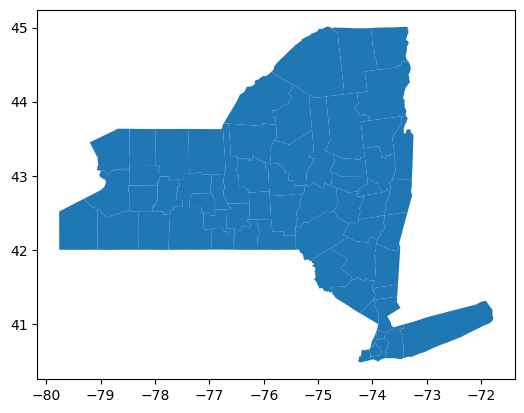

In [22]:
# Filter to only New York counties and plot
ny_counties = counties[counties['statefp'] == '36']
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [23]:
# a.
# Unique values of new york counties
ny_counties['name'].unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [24]:
# b.
# Unique counties from spills data frame
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Canada - Region 5',
       'Canada - Region 6', 'Canada - Region 8', 'Canada - Region 9',
       'Cattaraugus', 'Cattaraugus Indian Reservation', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Connecticut - Region 1', 'Connecticut - Region 3 (N)',
       'Connecticut - Region 3 (T)', 'Connecticut - Region 4', 'Cortland',
       'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton',
       'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings',
       'Lewis', 'Livingston', 'Madison', 'Massachusetts - Region 4',
       'Monroe', 'Montgomery', 'Nassau', 'New Jersey - Region 2',
       'New Jersey - Region 3 (N)', 'New Jersey - Region 3 (T)',
       'New York', 'Niagara', 'Oil Springs Indian Reservation', 'Oneida',
       'Onondaga', 'Onondaga Indian Reservation', 'Ontario', 'Orange',
       'Orleans', 'Oswego', 'Otsego', 'Pennsylvania - Region 3',
       'Pennsylvania - Region 7', 'P



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [25]:
# Find counties in spills df that aren't in counties df
diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_counties['name'])
diff_names_spills

array(['Canada - Region 5', 'Canada - Region 6', 'Canada - Region 8',
       'Canada - Region 9', 'Cattaraugus Indian Reservation',
       'Connecticut - Region 1', 'Connecticut - Region 3 (N)',
       'Connecticut - Region 3 (T)', 'Connecticut - Region 4',
       'Massachusetts - Region 4', 'New Jersey - Region 2',
       'New Jersey - Region 3 (N)', 'New Jersey - Region 3 (T)',
       'Oil Springs Indian Reservation', 'Onondaga Indian Reservation',
       'Pennsylvania - Region 3', 'Pennsylvania - Region 7',
       'Pennsylvania - Region 8', 'Pennsylvania - Region 9',
       'Poospatuck Indian Reservation', 'Shinnecock Indian Reservation',
       'St Lawrence', 'St. Regis Indian Reservation - Region 5',
       'Tuscarora Indian Reservation', 'Vermont - Region 4',
       'Vermont - Region 5 (R)'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [26]:
# Find counties in counties df that aren't in spills df
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county['county'])
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [27]:
# e. 
# Number of spills at Tuscarora Indian Reservation
spills_per_county.loc[spills_per_county['county'] == 'Tuscarora Indian Reservation', :]

,county,n_spills
77,Tuscarora Indian Reservation,5


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [28]:
# Find the  location of St Lawrence in the data frame
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', :]

,county,n_spills
70,St Lawrence,6531


In [29]:
# Fix name of the St. Lawrence county
spills_per_county.at[70, 'county'] = 'St. Lawrence'

In [30]:
# Check that the name was updated
assert spills_per_county.at[70, 'county'] == 'St. Lawrence'

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [31]:
# a.
# Prepare dataframes to join
ny_counties = ny_counties.rename(columns={'name':'county'})

In [32]:
# b. 
# Inner join counties and spills dataframes
ny_counties = pd.merge(spills_per_county, ny_counties, on='county', how='inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [33]:
# c.
# Find the location of Niagara in the data frame
ny_counties.loc[ny_counties['county'] == 'Niagara', :]

,county,n_spills,statefp,countyfp,countyns,geoid,geoidfq,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
31,Niagara,8052,36,063,00974130,36063,0500000US36063,Niagara County,06,H1,G4020,160,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084..."


In [34]:
# Update the value to include the 5 spills from TIR
ny_counties.at[31, 'n_spills'] = (ny_counties.at[31, 'n_spills'] + 5)

In [35]:
# Check that the value was correctly updated
assert ny_counties.at[31, 'n_spills'] == 8057

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



In [36]:
ny_counties.columns
ny_counties = gpd.GeoDataFrame(ny_counties)

Might need to use geoplot for the chloropleth map?

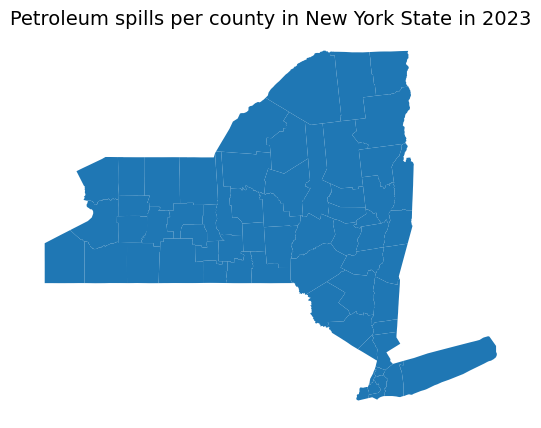

In [37]:
# a.
fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Petroleum spills per county in New York State in 2023', fontsize=14)

ny_counties.plot(ax=ax)

# Add spills per county colored by energy course
# ny_counties['n_spills'].plot(ax=ax) 
                  # column='primsource', # color by values in this column
                  # legend=True,
                  # markersize=4,
                  # cmap='tab20',
                  # alpha=0.5,
                  # legend_kwds={
                      # 'title':'Primary energy course',
                      # 'title_fontsize':'small',
                      # 'ncol':6, # sets number of columns, makes it horizontal
                      # 'loc':'upper left',
                      # 'bbox_to_anchor':(0,0)
                      # }
                      #)


plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

*Your answer here*